# Importing libs and files

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from google.colab import files

uploaded = files.upload()

Saving results_with_crew.csv to results_with_crew (1).csv


# Reading CSV file into a Pandas Dataframe

In [37]:
movie_data = pd.read_csv("results_with_crew.csv")

# Initial data exploration

In [38]:
movie_data.head()
# list(movie_data.columns)

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3115613,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""..."
1,tt0068646,The Godfather,1972,2,9.2,2172426,175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""..."
2,tt0468569,The Dark Knight,2008,3,9.1,3091520,152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...","Action, Crime, Drama","<a href=""https://www.imdb.com/title/tt0468569""...","<a href=""https://www.imdb.com/title/tt0468569""..."
3,tt0167260,The Lord of the Rings: The Return of the King,2003,4,9.0,2116489,201,Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens, P...","Adventure, Drama, Fantasy","<a href=""https://www.imdb.com/title/tt0167260""...","<a href=""https://www.imdb.com/title/tt0167260""..."
4,tt0108052,Schindler's List,1993,5,9.0,1553126,195,Steven Spielberg,"Thomas Keneally, Steven Zaillian","Biography, Drama, History","<a href=""https://www.imdb.com/title/tt0108052""...","<a href=""https://www.imdb.com/title/tt0108052""..."


# Visualizing top 10 movies by IMDB rating
- Selecting indexes from 0 to 9 with loc and inserting into a new DF
- Defining different colors according to average rating
- Creating a legend for chart colors
- Defining chart width and height
- Creating a bar chart with movie names and their ratings
- Adjusting xticks rotation and setting the legend

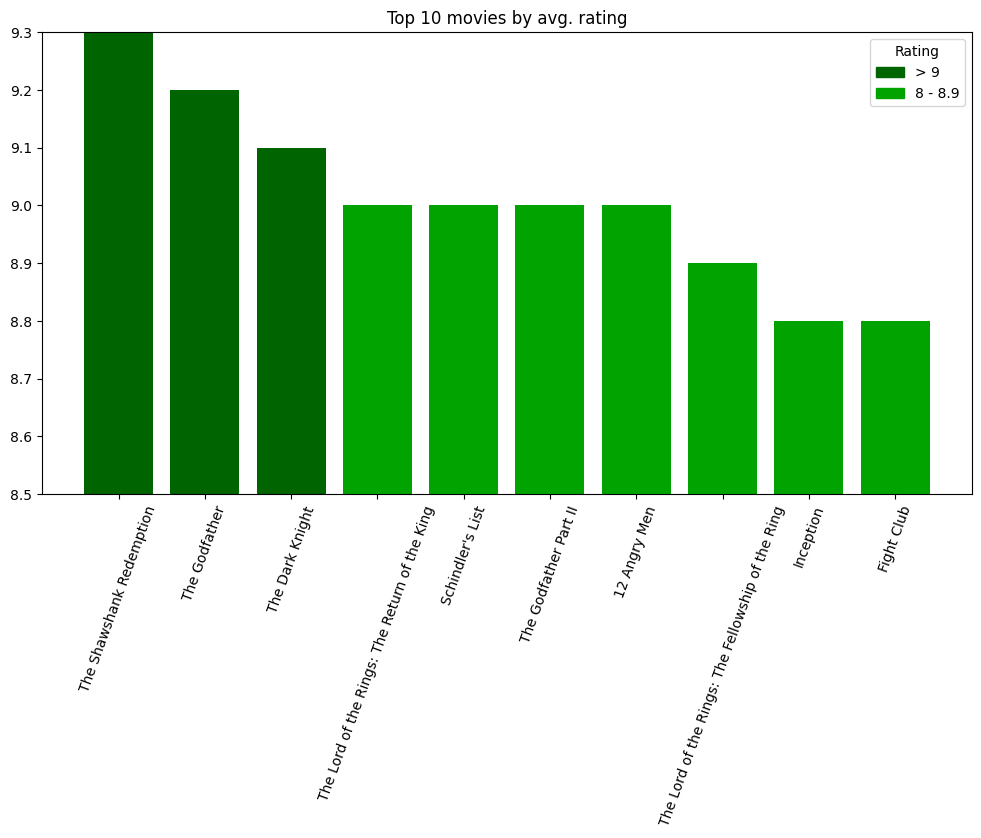

In [39]:
top_10_movies = movie_data.loc[:9]
colors = [
    '#006400' if rating > 9 else '#00A300'
    for rating in top_10_movies["averageRating"]
]

greater_than_9 = mpatches.Patch(color="#006400", label="> 9")
less_than_9 = mpatches.Patch(color="#00A300", label="8 - 8.9")
plt.figure(figsize=(12, 6))
plt.bar(top_10_movies["primaryTitle"], top_10_movies["averageRating"], color=colors)
plt.ylim(8.5, 9.3)
plt.title("Top 10 movies by avg. rating")
plt.xticks(rotation=70)
plt.legend(handles=[greater_than_9, less_than_9], title="Rating")


# Viewing top genres in the top 100 rated movies
- Selecting top 100 rated movies
- Splitting unique genres
- Using the explode method to turn each list element into a new row
- Using list compreheension to create a 0.2 space for each chart element
- Turning the list into a tuple to use in the chart's explode parameter
- Creating the figure and main axis
- Creating pie chart, defining data, labels and more visual settings


Text(0.5, 1.0, 'Top genres on 100 best rated movies')

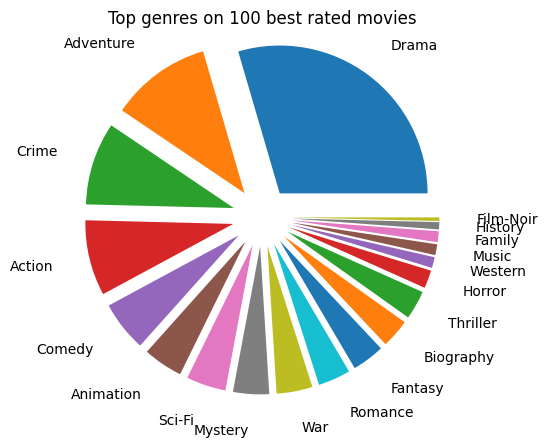

In [40]:
top_100_movies = movie_data.loc[0:99, "genres"]
genres = top_100_movies.str.split(", ")
genres = genres.explode().value_counts()
explode = [
    0.2 for genre in genres.index
]
explode = tuple(explode)

fig, ax = plt.subplots()
ax.pie(genres, labels=genres.index, labeldistance=1.25, explode=explode)
plt.title("Top genres on 100 best rated movies")

# Top movie directors
- Filtering only movies with a considerated amount of ratings (at least 100k)
- Separating movies with more than one director
- Unifying DF with number of movies per director and average rating of their movies
- Ordering by average rating and adjusting chart settings

Text(0.5, 1.0, 'Top directors by movies avg. rating')

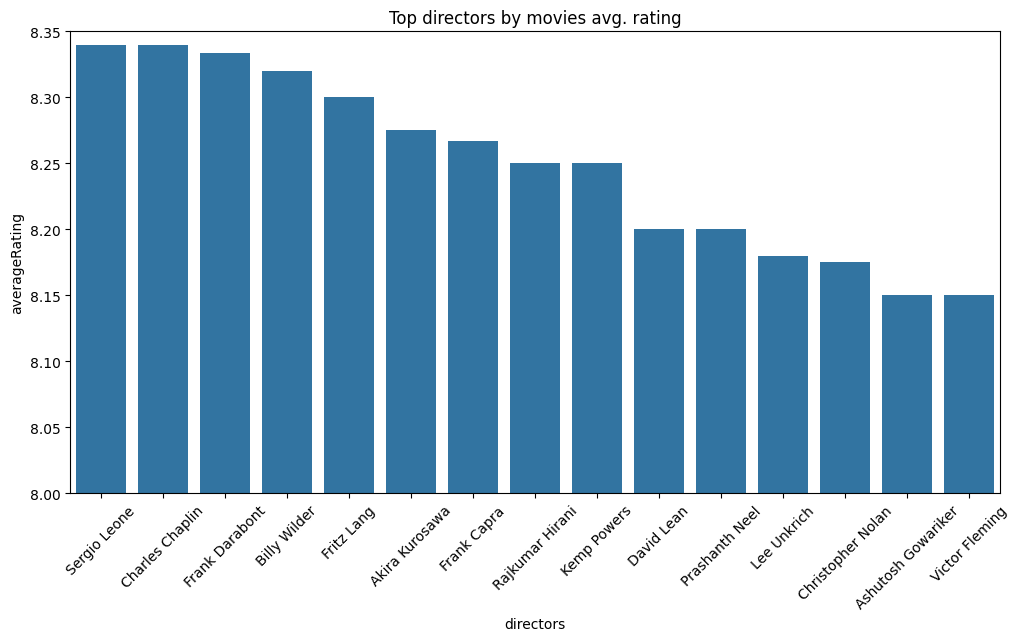

In [41]:
# Filtering only movies with more than 100k reviews
more_than_100k_reviews = movie_data[(movie_data["numVotes"] >= 100000)]
more_than_100k_reviews.loc[:, "directors"] = ( more_than_100k_reviews["directors"].str.split(", ") )
more_than_100k_reviews = more_than_100k_reviews.explode("directors")

# Unifying number of movies by directors and their average ratings
directors = pd.concat([more_than_100k_reviews["directors"].value_counts(), more_than_100k_reviews.groupby(["directors"])["averageRating"].mean()], axis=1)

# Selecting only directors with more than one movie
directors = directors[(directors["count"] > 1)]

# Ordering by director average rating
directors = directors.sort_values(by="averageRating", ascending=False)
top_10_directors = directors.iloc[0:15]

plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
sns.barplot(x=top_10_directors.index, y=top_10_directors["averageRating"])
plt.ylim(8, 8.35)
plt.title("Top directors by movies avg. rating")

# Best movie by year

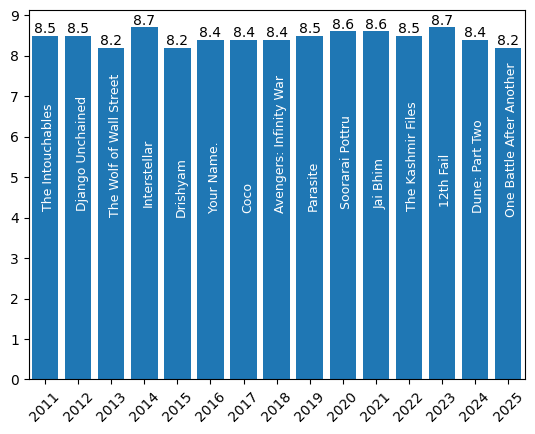

In [125]:
from matplotlib.ticker import MultipleLocator

# Selecting most famous movies (more than 100k reviews), grouping movies with same year and returning index with greater avg. rating
best_movies_index = movie_data[(movie_data["numVotes"] >= 100000)].groupby(["startYear"])["averageRating"].idxmax()

best_movies = movie_data.loc[best_movies_index][["primaryTitle", "startYear", "averageRating"]]

best_movies = best_movies.set_index("startYear")

best_movies = best_movies.sort_values(by="startYear", ascending=False)

best_movies = best_movies.iloc[0:15]

fig, ax = plt.subplots()

plt.xticks(rotation=45)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))

ax.set_xlim(best_movies.index.min() - 0.5, best_movies.index.max() + 0.5)

bars = ax.bar(best_movies.index, best_movies["averageRating"])
ax.bar_label(bars)

for bar, (_, row) in zip(bars, best_movies.iterrows()):
  x = bar.get_x()
  width = bar.get_width()
  height = bar.get_height()
  ax.text(x + (width / 2.5), height / 2, row["primaryTitle"], fontsize=9, color="white", rotation=90)